## MLP regression

In [1]:
## 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## 图像在jupyter notebook中显示
%matplotlib inline
## 显示的图片格式（mac中的高清格式），还可以设置为"bmp"等格式
%config InlineBackend.figure_format = "retina"
## 输出图显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

from sklearn import metrics
from sklearn.model_selection import train_test_split
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
## 读取数据集
data = pd.read_csv("/Users/daitu/慕课/Python机器学习入门/data/CASP.csv")
data.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


因变量RMSD，自变量F1～F9

In [4]:
data.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


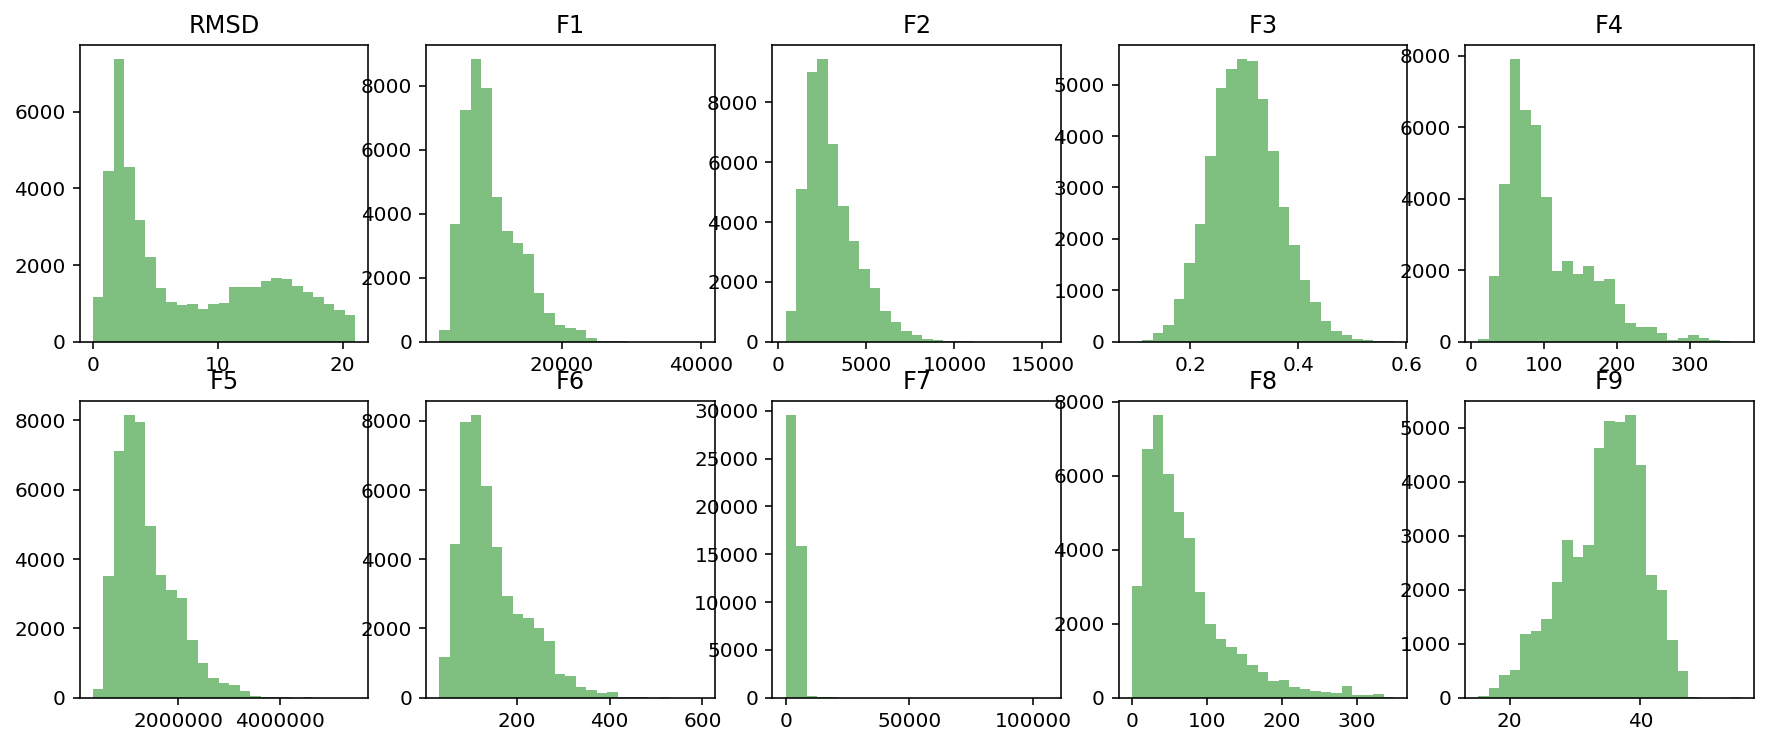

In [5]:
## 可视化每个变量
## 得到每个特征的直方图
plt.figure(figsize=(15,6))
for ii,name in enumerate(data.columns):
    plt.subplot(2,5,ii+1)
    plt.hist(data.iloc[:,ii],25,color="green",alpha = 0.5)
    plt.title(name)

plt.subplots_adjust()
plt.show()

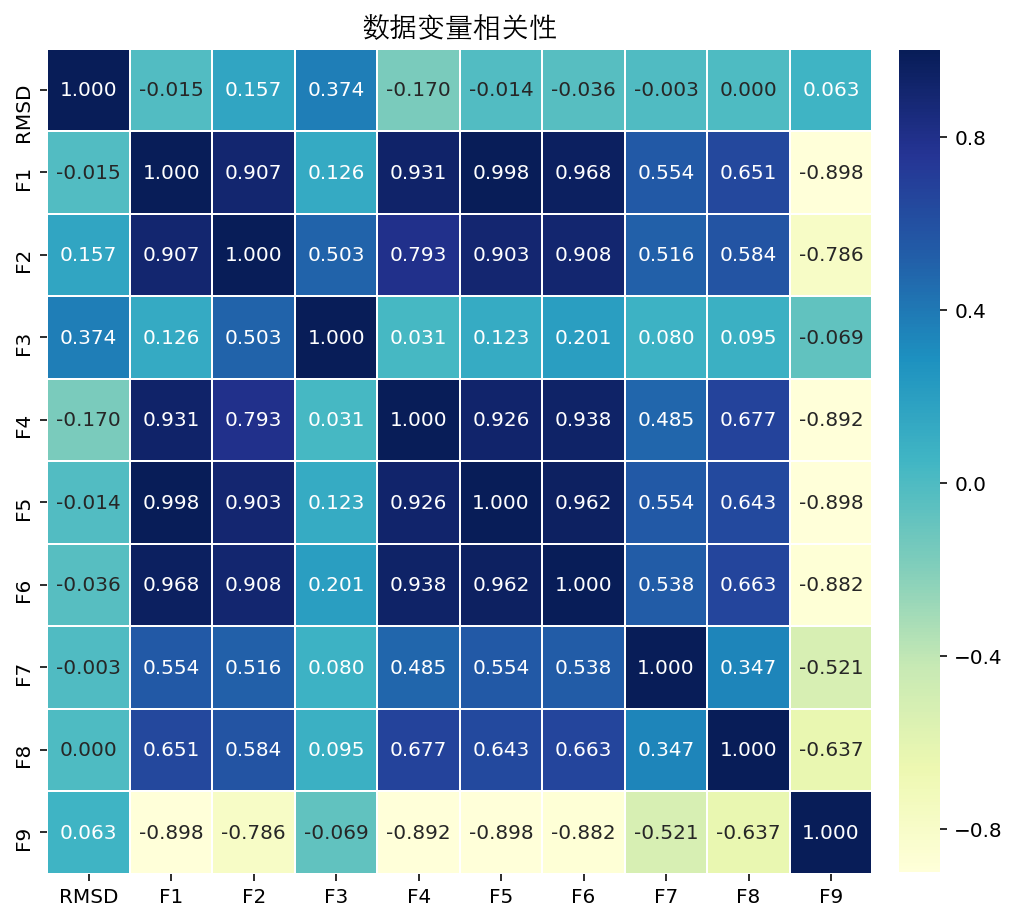

In [6]:
## 相关系数可视化热力图
## 分析数据间的相关性
datacor = np.corrcoef(data,rowvar=0)
datacor = pd.DataFrame(data=datacor,columns=data.columns,index=data.columns)


## 热力图可视化相关系数
plt.figure(figsize=(8,8))
ax = sns.heatmap(datacor,square=True,annot=True,fmt = ".3f",
                 linewidths=.5,cmap="YlGnBu",
                 cbar_kws={"fraction":0.046, "pad":0.03})
ax.set_title("数据变量相关性",fontproperties = fonts)
plt.show()


In [7]:
## 准备自变量和因变量
dataX = data.iloc[:,1:10]
dataY = data.iloc[:,0]
## 数据标准化
scale = StandardScaler(with_mean=True,with_std=True)
dataXS = scale.fit_transform(dataX)
##  数据切分
train_x,test_x,train_y,test_y = train_test_split(dataXS,dataY.values,test_size = 0.25,random_state = 2)
print(train_x.shape)
print(train_y.shape)

(34297, 9)
(34297,)


### 多元线性回归

In [9]:
## 多元回归
# formula = "RMSD ~ F1 + F2 + F3 + F4 + F5+ F6 + F7 + F8"
# lm = smf.ols(formula, data=data).fit()
# print(lm.summary())
train_xadd = sm.add_constant(train_x)  ## 添加常数项
lm = sm.OLS(train_y,train_xadd).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1490.
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:13:28   Log-Likelihood:            -1.0519e+05
No. Observations:               34297   AIC:                         2.104e+05
Df Residuals:                   34287   BIC:                         2.105e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7508      0.028    276.182      0.0

In [10]:
test_xadd = sm.add_constant(test_x)  ## 添加常数项
pre_y = lm.predict(test_xadd)
print("mean absolute error:", metrics.mean_absolute_error(test_y,pre_y))
print("mean squared error:", metrics.mean_squared_error(test_y,pre_y))

mean absolute error: 4.31258242795
mean squared error: 26.4610406583


### MLP回归分析

In [11]:
## 定义含有4个隐藏层的MLP网络
mlpr = MLPRegressor(hidden_layer_sizes=(100,100,100,100), ## 隐藏层的神经元个数
                    activation='tanh', 
                    solver='adam', 
                    alpha=0.0001,   ## L2惩罚参数
                    max_iter=100, 
                    random_state=123,
#                     early_stopping=True, ## 是否提前停止训练
#                     validation_fraction=0.2, ## 20%作为验证集
#                     tol=1e-8,
                   )

## 拟合训练数据集
mlpr.fit(train_x,train_y)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

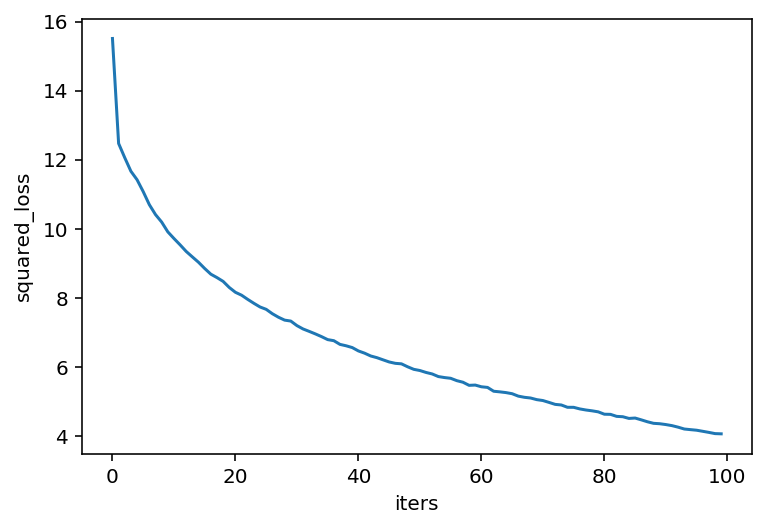

In [12]:
## 可视化损失函数
plt.figure()
plt.plot(mlpr.loss_curve_)
plt.xlabel("iters")
plt.ylabel(mlpr.loss)
plt.show()

In [13]:
## 对测试集上进行预测
pre_y = mlpr.predict(test_x)
print("mean absolute error:", metrics.mean_absolute_error(test_y,pre_y))
print("mean squared error:", metrics.mean_squared_error(test_y,pre_y))
## 输出在测试集上的R^2
print("在训练集上的R^2:",mlpr.score(train_x,train_y))
print("在测试集上的R^2:",mlpr.score(test_x,test_y))

mean absolute error: 2.4945679133
mean squared error: 13.7092643771
在训练集上的R^2: 0.794820185635
在测试集上的R^2: 0.629815410854


## 使用keras建立MLP回归

In [14]:
import keras as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [23]:
model = Sequential()
model.add(Dense(100,input_dim=train_x.shape[1],activation="tanh",name="full_1"))
model.add(Dense(100,activation="tanh",name="full_2"))
model.add(Dense(100,activation="tanh",name="full_3"))
model.add(Dense(100,activation="tanh",name="full_4"))
model.add(Dense(1, activation="linear"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
full_1 (Dense)               (None, 100)               1000      
_________________________________________________________________
full_2 (Dense)               (None, 100)               10100     
_________________________________________________________________
full_3 (Dense)               (None, 100)               10100     
_________________________________________________________________
full_4 (Dense)               (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 31,401
Trainable params: 31,401
Non-trainable params: 0
_________________________________________________________________


In [24]:
## 提前停止条件
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(loss='mean_squared_error', optimizer='adam')
model_fit = model.fit(train_x, train_y,batch_size=512,
                      epochs=200, verbose=0,
                      validation_split=0.2,
                      callbacks=[early_stopping])

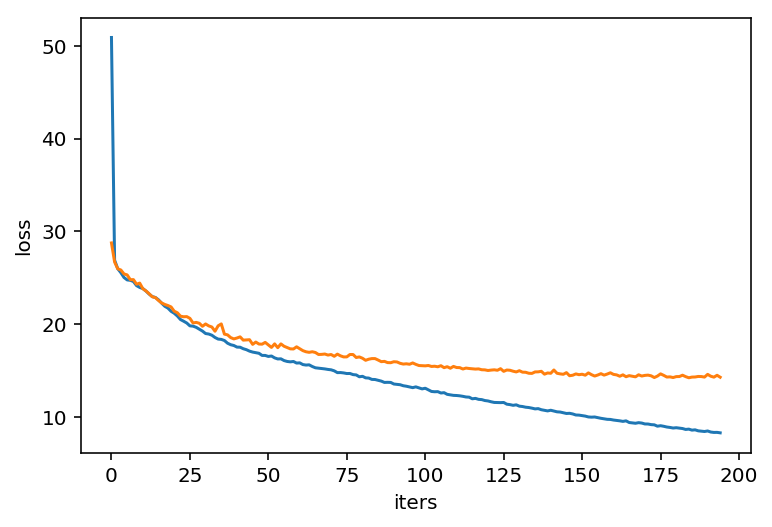

In [25]:
## 可视化
plt.figure()
plt.plot(model_fit.history["loss"])
plt.plot(model_fit.history["val_loss"])
plt.xlabel("iters")
plt.ylabel("loss")
plt.show()

In [26]:
## 对测试集上进行预测
pre_y = model.predict(test_x)
print("mean absolute error:", metrics.mean_absolute_error(test_y,pre_y))
print("mean squared error:", metrics.mean_squared_error(test_y,pre_y))

mean absolute error: 2.59342704679
mean squared error: 14.2165964199
